In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.utils import resample

In [2]:
data = pd.read_csv('thyroid_data.csv')
mapping = {'negative': 1, 'sick': 2, 'hyperthyroid': 3,'hypothyroid':4}
data

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2774,82,M,f,f,f,f,f,f,f,...,2.2,t,1,t,68,t,0.77,t,88,sick
3217,2776,79,M,f,f,f,f,f,f,f,...,1.1,t,0.7,t,116,t,0.85,t,137,sick
3218,2782,50,F,f,f,f,f,f,f,f,...,4.8,t,0.6,t,98,t,0.8,t,122,sick
3219,2786,73,?,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173,t,1,t,173,sick


In [3]:
data.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [4]:
data['Category'] = data['Category'].map(mapping)

In [5]:
data.shape

(3221, 28)

In [6]:
data = pd.read_csv('thyroid_data.csv')
n = len(data[data['Category'] == 'hyperthyroid'])
print("No of hyperthyroid in Dataset:",n)

n1 = len(data[data['Category'] == 'hypothyroid'])
print("No of hypothyroid in Dataset:",n1)

n2 = len(data[data['Category'] == 'sick'])
print("No of sick in Dataset:",n2)

n3 = len(data[data['Category'] == 'negative'])
print("No of negative in Dataset:",n3)

No of hyperthyroid in Dataset: 77
No of hypothyroid in Dataset: 220
No of sick in Dataset: 171
No of negative in Dataset: 2753


In [7]:
## checking missing values

In [8]:
data.isnull().sum()

S.no                         0
Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

In [9]:
##### it can be see  that there are no missing values. But in the dataset the missing values are replaced with the invalid values like '?'. Let's replace such values with 'nan' and check for the missing values again.


In [10]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

Age 1
Sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


In [11]:
## dropping unnecessary columns

In [12]:
data=data.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured',
       'FTI Measured'],axis=1)


In [13]:
# Replacing all ? values with numpy nan

In [14]:
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

#data.isnull().sum()


Age 0
Sex 0
Sick 0
Pregnant 0
Thyroid Surgery 0
Goitre 0
Tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Category 0


In [15]:
## all values are now replaed

In [16]:
## print all unique values in the dataset

for column in data.columns:
    print(column,(data[column].unique()))


Age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
Sex ['F' 'M' nan]
Sick ['f' 't']
Pregnant ['f' 't']
Thyroid Surgery ['f' 't']
Goitre ['f' 't']
Tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [17]:
data.dtypes


Age                object
Sex                object
Sick               object
Pregnant           object
Thyroid Surgery    object
Goitre             object
Tumor              object
TSH                object
T3                 object
TT4                object
T4U                object
FTI                object
Category           object
dtype: object

In [18]:
data.describe()

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
count,3220,3094,3221,3221,3221,3221,3221,2974,2632,3079,2945,2947,3221
unique,93,2,2,2,2,2,2,263,64,217,138,209,4
top,59,F,f,f,f,f,f,0.2,2,101,0.99,112,negative
freq,91,2108,3080,3175,3180,3194,3130,103,184,73,89,59,2753


In [19]:
## Handling missing values

data['Age'].fillna((data['Age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

In [20]:
### Handling nominal categorical variables

## one hot encoding method is performed for that
sex = data[["Sex"]]
sex = pd.get_dummies(sex, drop_first= True)

sick = data[["Sick"]]
sick = pd.get_dummies(sick, drop_first= True)

pregnant = data[["Pregnant"]]
pregnant = pd.get_dummies(pregnant, drop_first= True)

thyroid_surgery = data[["Thyroid Surgery"]]
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)

goitre = data[["Goitre"]]
goitre = pd.get_dummies(goitre, drop_first= True)

tumor = data[["Tumor"]]
tumor = pd.get_dummies(tumor, drop_first= True)

data.columns

final_df = pd.concat([data,sex, sick, pregnant, thyroid_surgery,
       goitre, tumor,], axis = 1)

final_df.columns

final_df.drop(['Sex', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'Goitre', 'Tumor'], axis = 1, inplace = True)


In [21]:
## Checking the missing values
final_df.isnull().sum()

final_df.to_csv('cleaned data.csv',index=False)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                3221 non-null   object
 1   TSH                3221 non-null   object
 2   T3                 3221 non-null   object
 3   TT4                3221 non-null   object
 4   T4U                3221 non-null   object
 5   FTI                3221 non-null   object
 6   Category           3221 non-null   object
 7   Sex_M              3221 non-null   bool  
 8   Sick_t             3221 non-null   bool  
 9   Pregnant_t         3221 non-null   bool  
 10  Thyroid Surgery_t  3221 non-null   bool  
 11  Goitre_t           3221 non-null   bool  
 12  Tumor_t            3221 non-null   bool  
dtypes: bool(6), object(7)
memory usage: 195.1+ KB


In [22]:
## the data has no missing values

In [23]:

final_df['Category']=final_df['Category'].astype('category')

<ipython-input-24-f5fb0fb41a0b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column])
<ipython-input-24-f5fb0fb41a0b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column])
<ipython-input-24-f5fb0fb41a0b>:9: UserWarning: 

`distplot` is a deprecated function and will be 

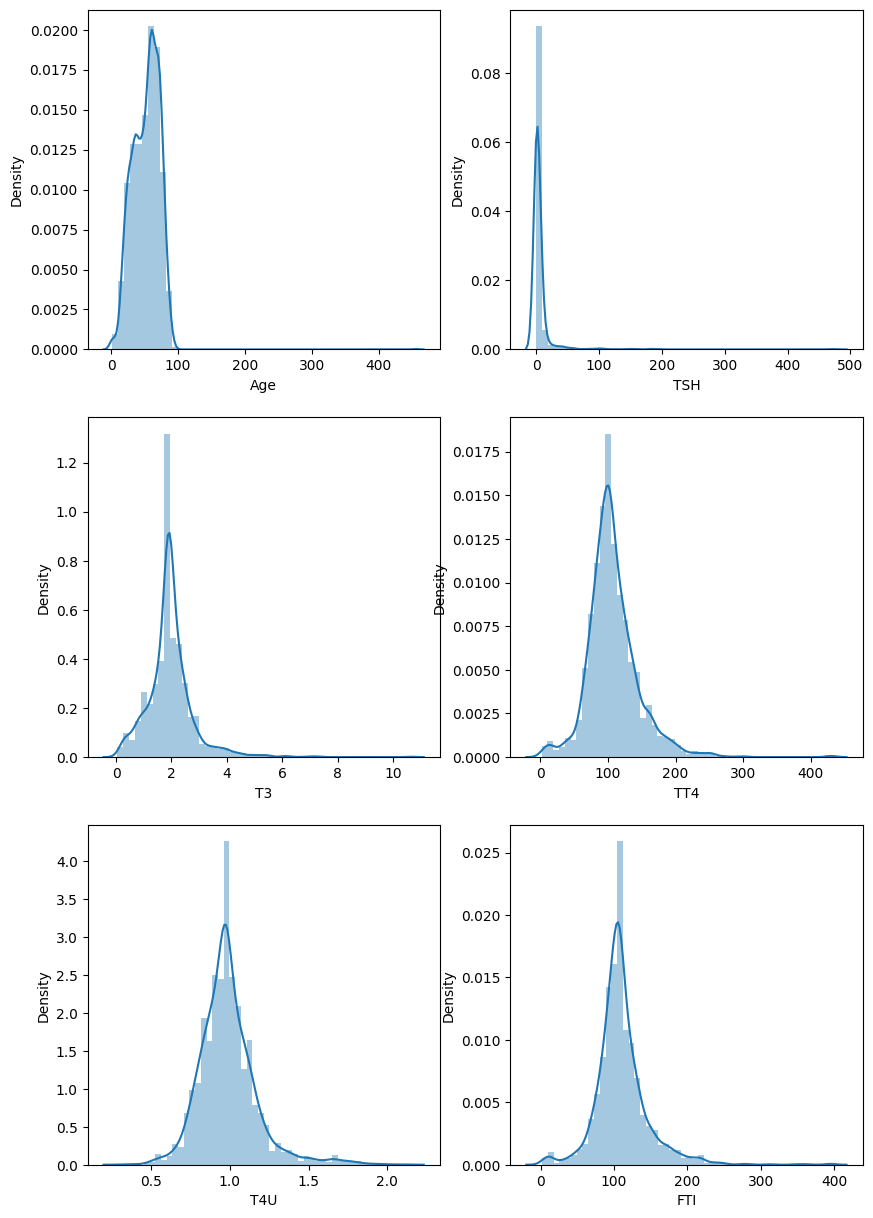

In [24]:
 ## checking distribution for continuous data in the dataset.
columns = ['Age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(final_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()



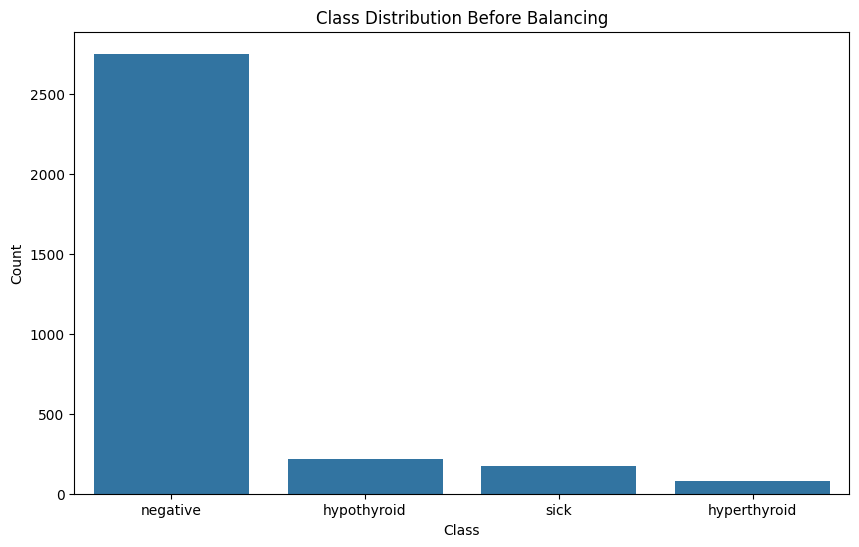

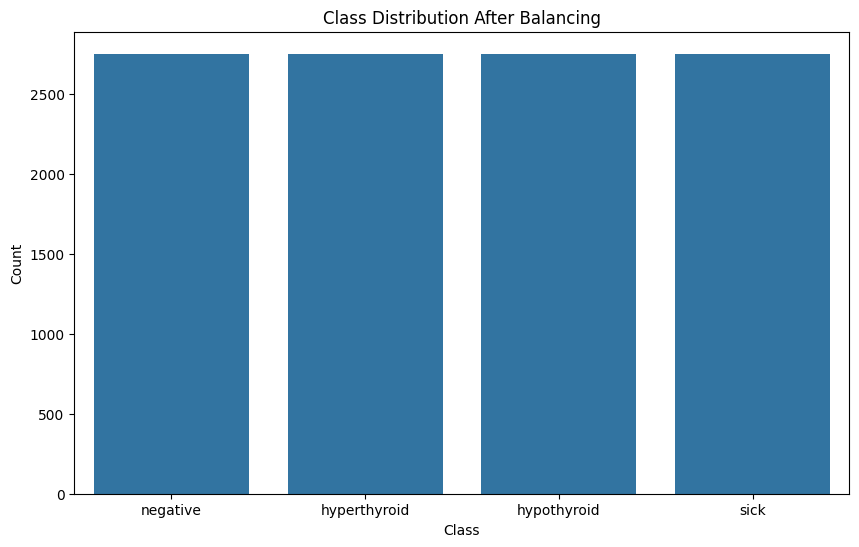

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv('cleaned data.csv')

# Checking class distribution before balancing
class_distribution_before = df['Category'].value_counts().reset_index()
class_distribution_before.columns = ['Class', 'Count']

# Creating a count plot for class distribution before balancing
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_distribution_before)
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Instantiate RandomOverSampler
oversampler = RandomOverSampler()

# Resampling the dataset using random oversampling
X_resampled, y_resampled = oversampler.fit_resample(df.drop('Category', axis=1), df['Category'])

# Combining resampled features and target into a DataFrame
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('Category', axis=1).columns),
                           pd.Series(y_resampled, name='Category')], axis=1)

# Checking class distribution after balancing
class_distribution_after = balanced_data['Category'].value_counts().reset_index()
class_distribution_after.columns = ['Class', 'Count']

# Creating  a count plot for class distribution after balancing
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_distribution_after)
plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Saving balanced data to a new CSV file
balanced_data.to_csv('balanced_dataset.csv', index=False)


**MODEL** **DEVELOPMENT**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('balanced_dataset.csv')

columns = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t',
           'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t']

X = data[columns]
y = data['Category']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8266000907852927
Classification Report:
              precision    recall  f1-score   support

hyperthyroid       0.84      0.96      0.90       557
 hypothyroid       0.88      0.78      0.83       544
    negative       0.82      0.71      0.76       551
        sick       0.78      0.85      0.81       551

    accuracy                           0.83      2203
   macro avg       0.83      0.83      0.82      2203
weighted avg       0.83      0.83      0.82      2203



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('balanced_dataset.csv')

columns = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t',
           'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t']

X = data[columns]
y = data['Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Decision Tree Accuracy: 0.899682251475261
Decision Tree Classification Report:
              precision    recall  f1-score   support

hyperthyroid       0.88      1.00      0.94       557
 hypothyroid       0.88      0.92      0.89       544
    negative       1.00      0.81      0.89       551
        sick       0.87      0.87      0.87       551

    accuracy                           0.90      2203
   macro avg       0.91      0.90      0.90      2203
weighted avg       0.91      0.90      0.90      2203


Random Forest Accuracy: 0.9005901044030867
Random Forest Classification Report:
              precision    recall  f1-score   support

hyperthyroid       0.89      1.00      0.94       557
 hypothyroid       0.88      0.91      0.89       544
    negative       1.00      0.81      0.89       551
        sick       0.86      0.89      0.87       551

    accuracy                           0.90      2203
   macro avg       0.91      0.90      0.90      2203
weighted avg       0.91  

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('balanced_dataset.csv')

columns = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t',
           'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t']

X = data[columns]
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8697231048570132
Classification Report:
              precision    recall  f1-score   support

hyperthyroid       0.89      0.96      0.92       557
 hypothyroid       0.80      0.93      0.86       544
    negative       1.00      0.72      0.83       551
        sick       0.83      0.87      0.85       551

    accuracy                           0.87      2203
   macro avg       0.88      0.87      0.87      2203
weighted avg       0.88      0.87      0.87      2203



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('balanced_dataset.csv')

columns = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t',
           'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t']

X = data[columns]
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7753064003631411
Classification Report:
              precision    recall  f1-score   support

hyperthyroid       0.84      0.94      0.89       557
 hypothyroid       0.78      0.63      0.70       544
    negative       0.71      0.68      0.70       551
        sick       0.76      0.84      0.80       551

    accuracy                           0.78      2203
   macro avg       0.77      0.77      0.77      2203
weighted avg       0.77      0.78      0.77      2203



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
def predict_thyroid_disease(user_data):

    data = pd.read_csv('balanced_dataset.csv')

    columns = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Sex_M', 'Sick_t',
               'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t']

    X = data[columns]
    y = data['Category']

    # Training a Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X, y)

    # Predictig the type of thyroid for user_data
    prediction = rf_model.predict(user_data)

    return prediction

user_data = {
    'Age': 63,
    'TSH': 0.03,
    'T3': 5.5,
    'TT4': 199,
    'T4U': 1.05,
    'FTI': 190,
    'Sex_M': 0,
    'Sick_t': 0,
    'Pregnant_t': 0,
    'Thyroid Surgery_t': 0,
    'Goitre_t': 0,
    'Tumor_t': 0
}

user_df = pd.DataFrame([user_data])

prediction = predict_thyroid_disease(user_df)

print("Predicted Type of Thyroid:", prediction)

Predicted Type of Thyroid: ['hyperthyroid']


#**EXPLORATORY** DATA ANALYSIS






Summary statistics for numerical columns:
                Age           TSH            T3           TT4           T4U  \
count  11012.000000  11012.000000  11012.000000  11012.000000  11012.000000   
mean      54.760262     10.597203      2.015828    115.953069      0.959577   
std       19.485646     37.552665      1.357257     58.643881      0.188018   
min        1.000000      0.005000      0.050000      2.000000      0.310000   
25%       41.000000      0.150000      1.000000     81.000000      0.840000   
50%       58.000000      1.500000      1.900000    102.000000      0.960000   
75%       70.000000      7.700000      2.500000    145.000000      1.050000   
max      455.000000    478.000000     10.600000    430.000000      2.120000   

                FTI  
count  11012.000000  
mean     123.507410  
std       59.647777  
min        2.000000  
25%       91.000000  
50%      107.000000  
75%      152.000000  
max      395.000000  


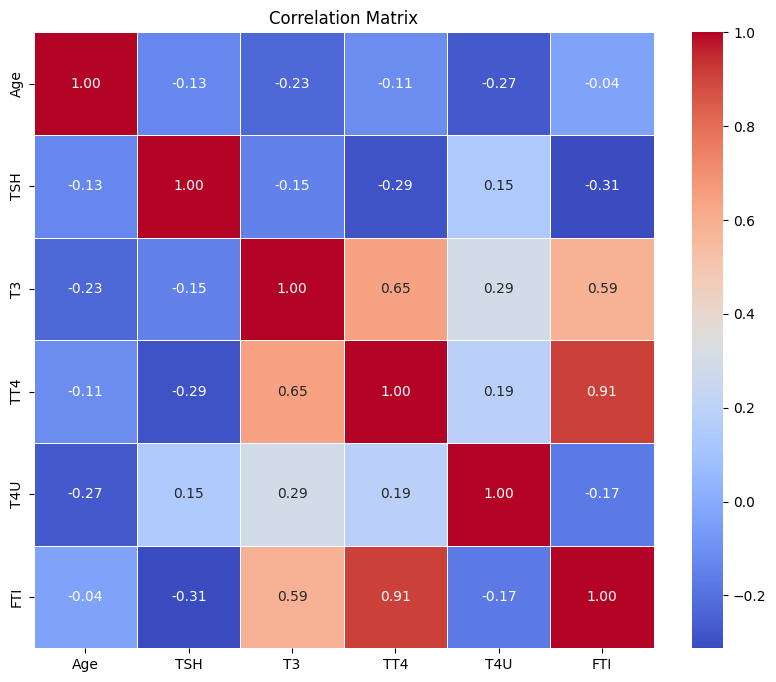

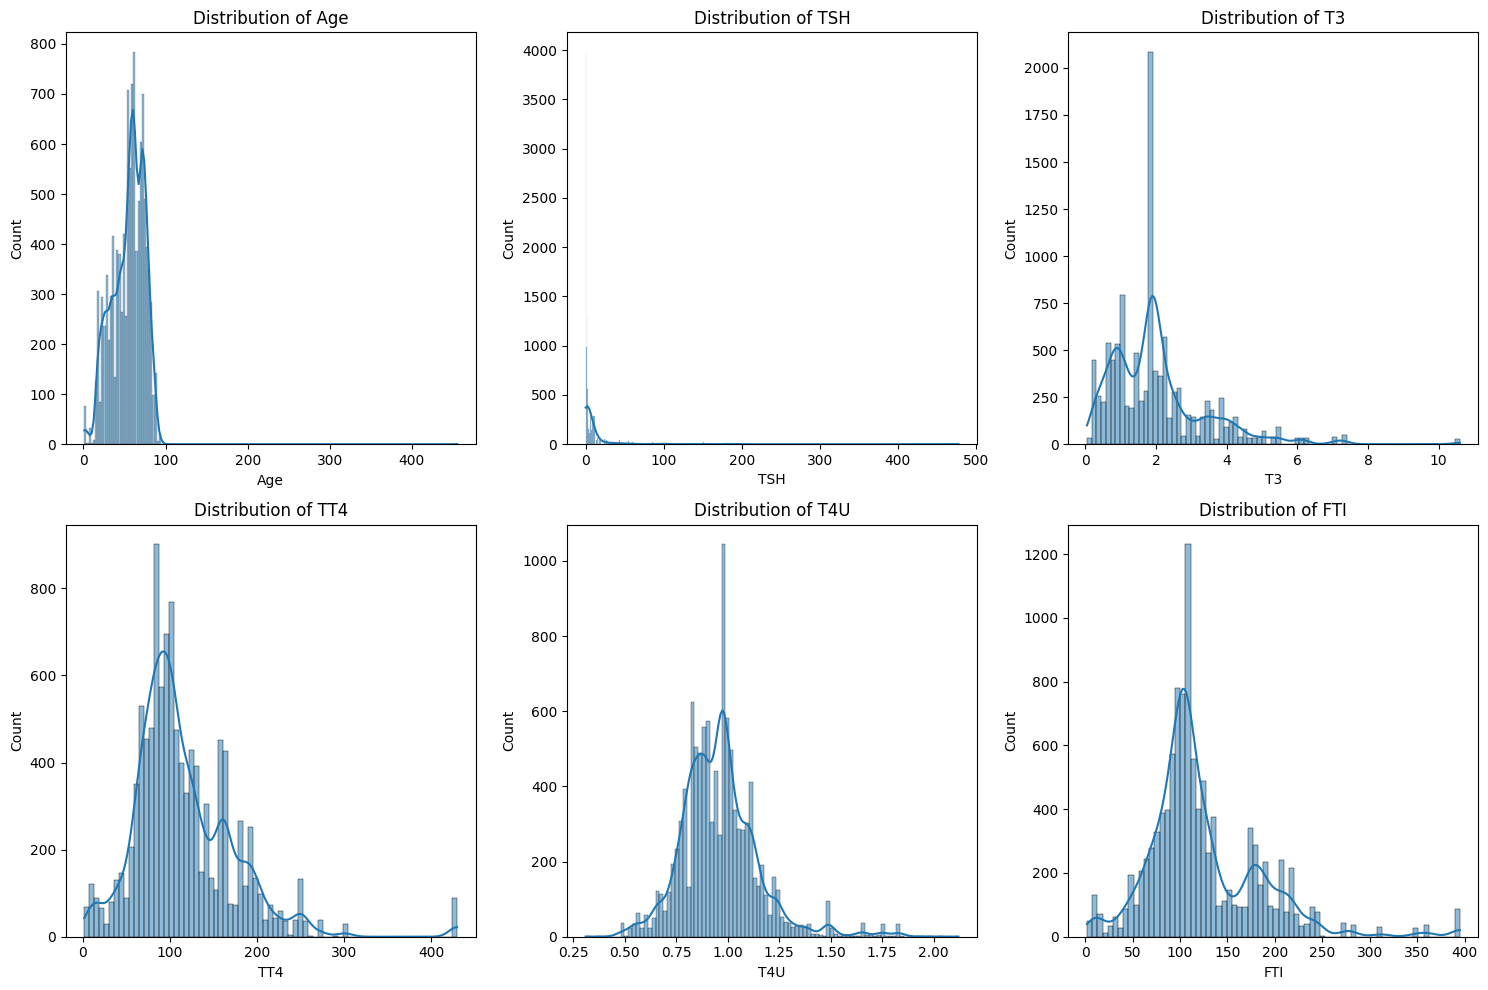

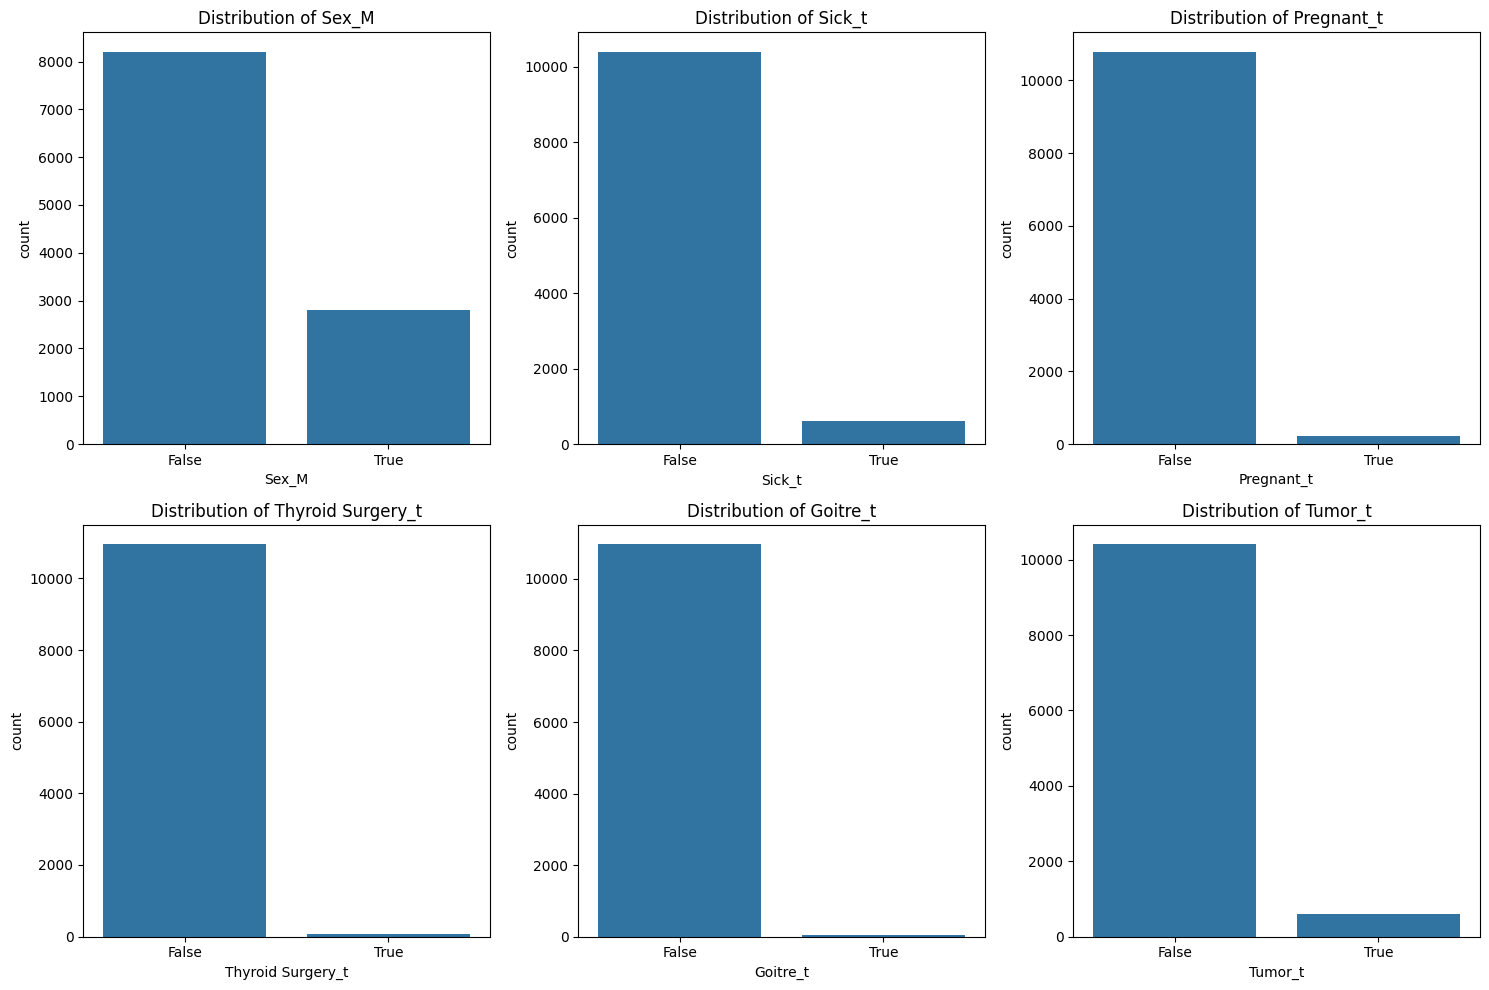

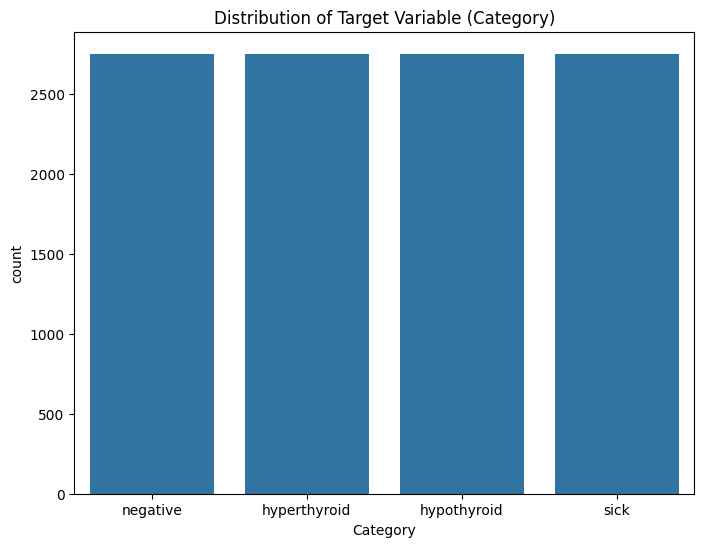

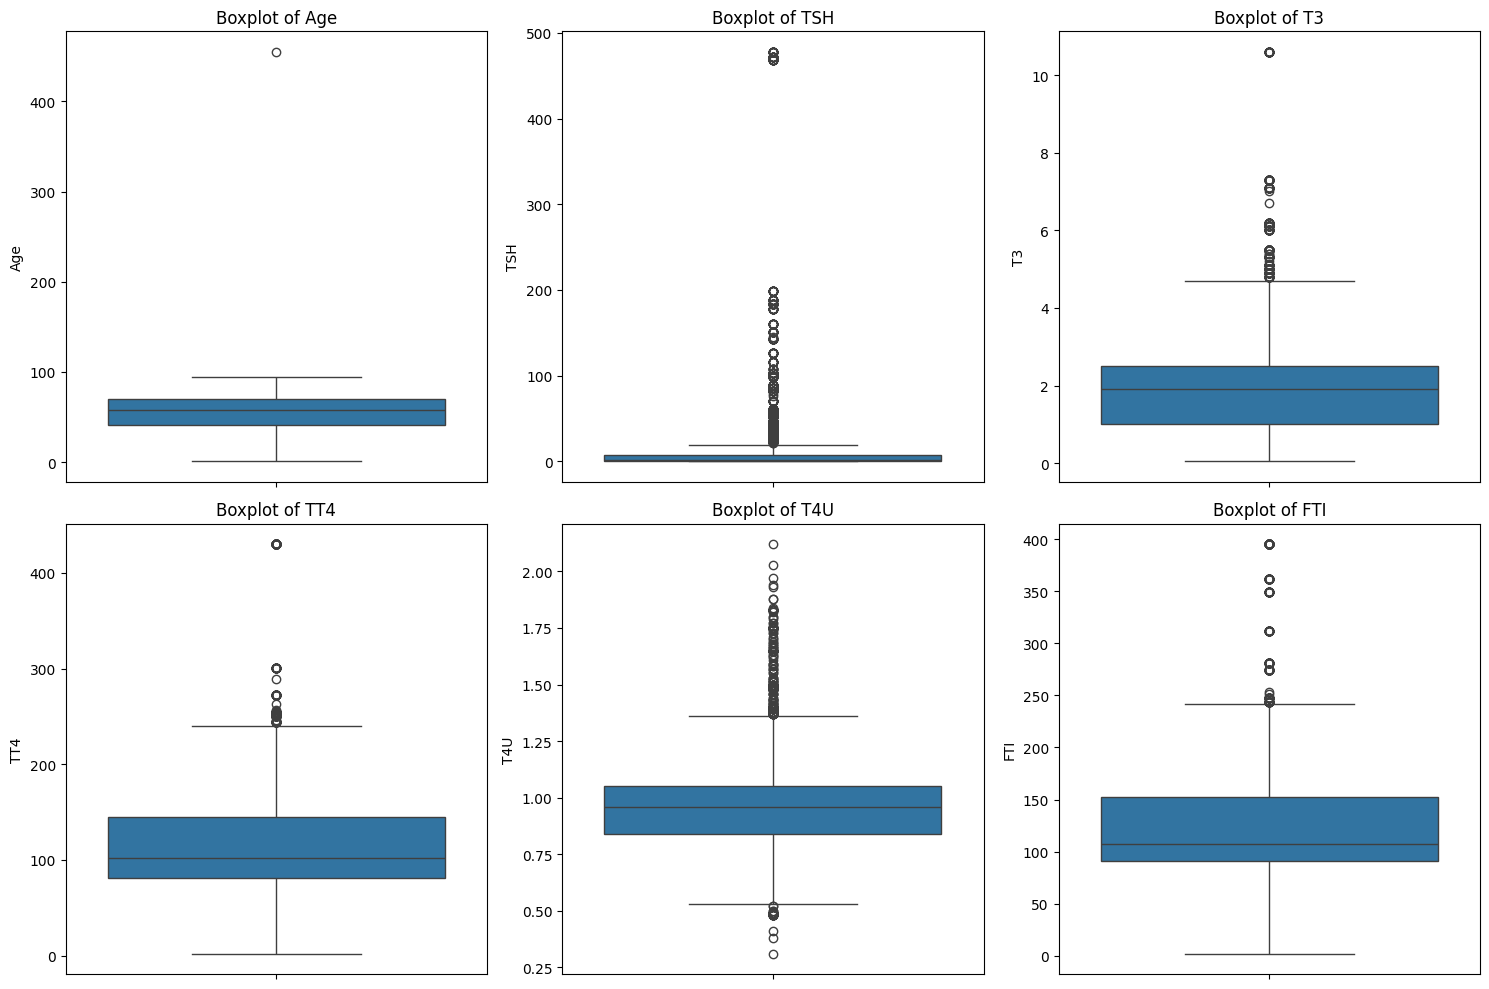

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("balanced_dataset.csv")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nSummary statistics for numerical columns:")
print(df[numeric_cols].describe())


# Correlation analysis
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Distribution of categorical variables
categorical_cols = ['Sex_M', 'Sick_t', 'Pregnant_t', 'Thyroid Surgery_t', 'Goitre_t', 'Tumor_t']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Target variable analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Target Variable (Category)')
plt.show()


# Outlier detection (using box plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


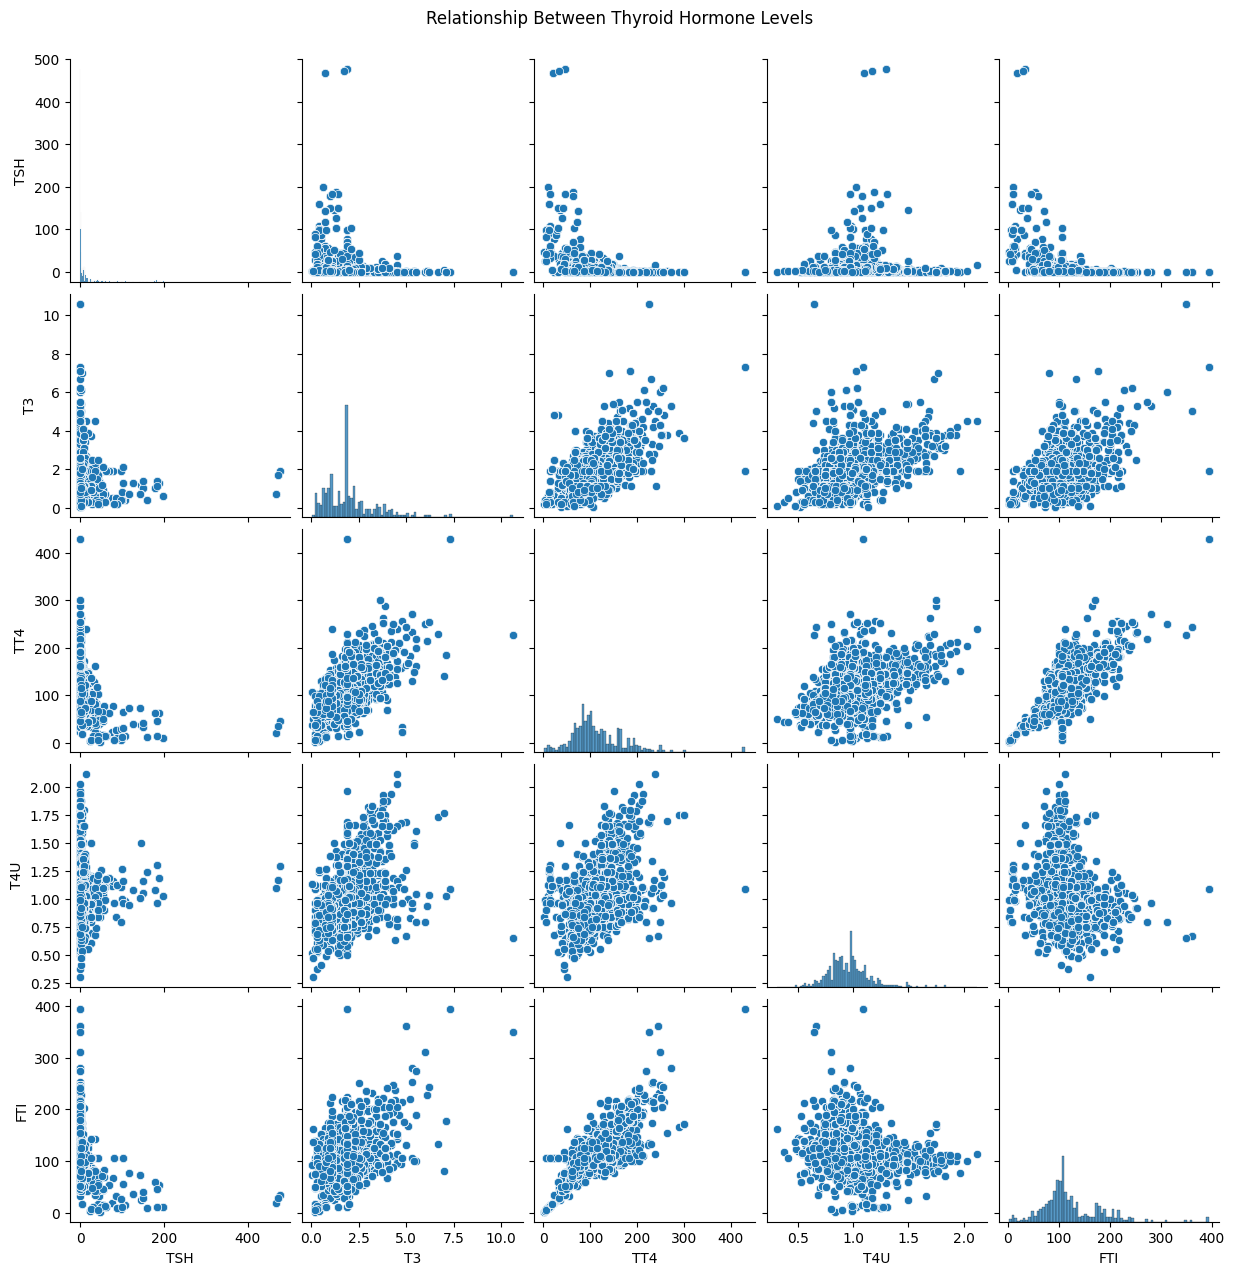

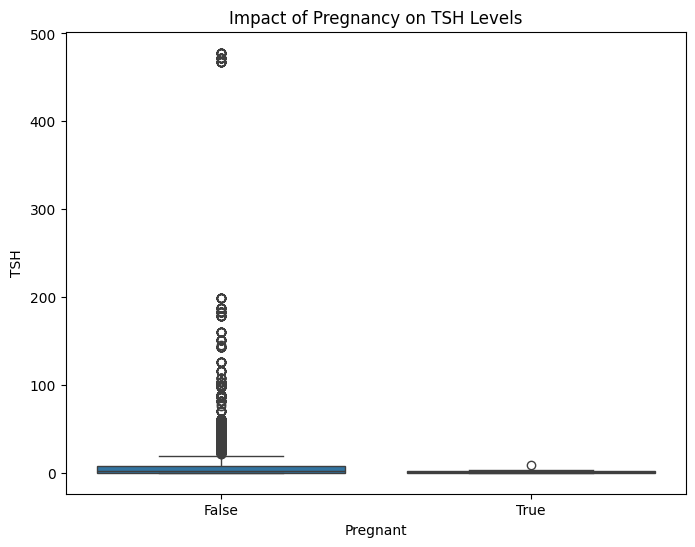

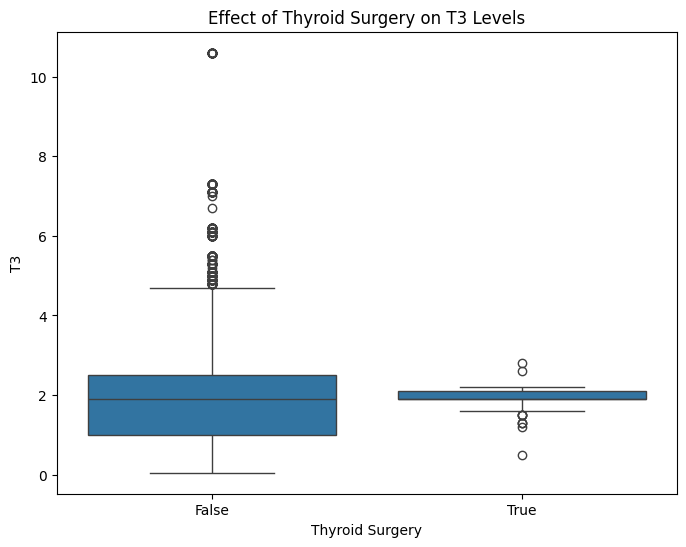

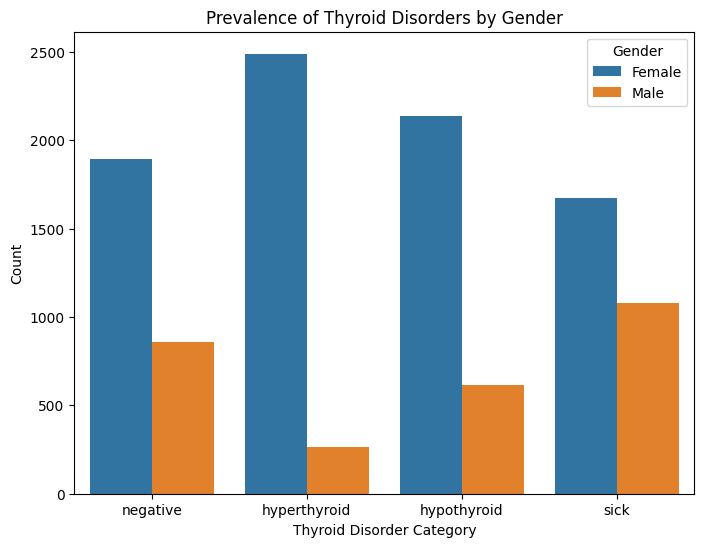

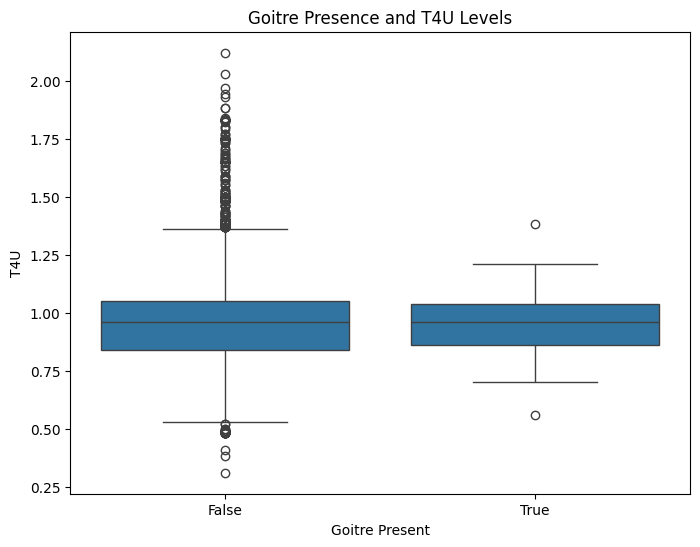

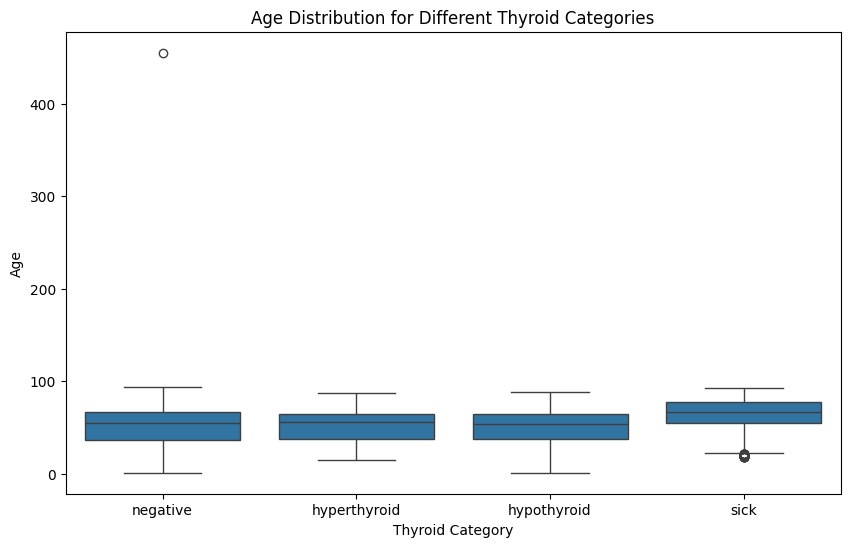

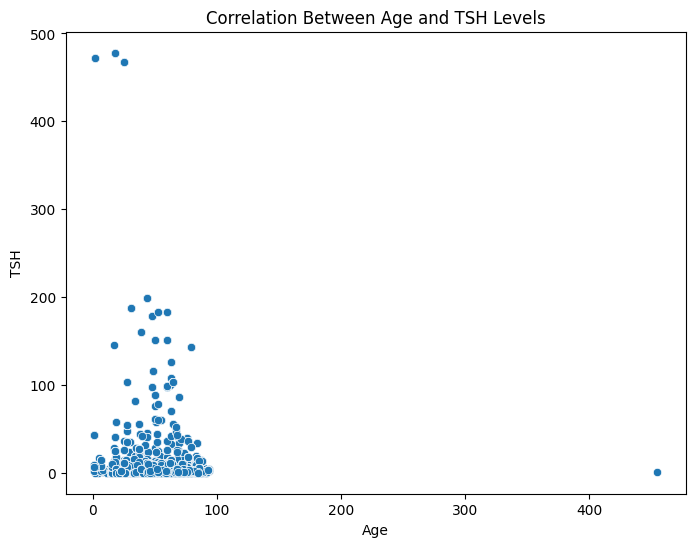

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("balanced_dataset.csv")

sns.pairplot(df[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])
plt.suptitle('Relationship Between Thyroid Hormone Levels', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pregnant_t', y='TSH')
plt.title('Impact of Pregnancy on TSH Levels')
plt.xlabel('Pregnant')
plt.ylabel('TSH')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Thyroid Surgery_t', y='T3')
plt.title('Effect of Thyroid Surgery on T3 Levels')
plt.xlabel('Thyroid Surgery')
plt.ylabel('T3')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category', hue='Sex_M')
plt.title('Prevalence of Thyroid Disorders by Gender')
plt.xlabel('Thyroid Disorder Category')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Goitre_t', y='T4U')
plt.title('Goitre Presence and T4U Levels')
plt.xlabel('Goitre Present')
plt.ylabel('T4U')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Age')
plt.title('Age Distribution for Different Thyroid Categories')
plt.xlabel('Thyroid Category')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='TSH')
plt.title('Correlation Between Age and TSH Levels')
plt.xlabel('Age')
plt.ylabel('TSH')
plt.show()


**HYPOTHESIS TESTING**

In [33]:
from scipy.stats import ttest_ind

# Extractting TT4 levels for sick and healthy individuals
tt4_sick = data[data['Sick_t'] == 1]['TT4']
tt4_healthy = data[data['Sick_t'] == 0]['TT4']

# Performing t-test
t_statistic, p_value = ttest_ind(tt4_sick, tt4_healthy)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in TT4 levels between sick and healthy individuals (p < 0.05).")
else:
    print("There is no significant difference in TT4 levels between sick and healthy individuals (p >= 0.05).")


T-Statistic: -7.8403687643585815
P-Value: 4.9067024969550515e-15
There is a significant difference in TT4 levels between sick and healthy individuals (p < 0.05).


In [34]:
from scipy.stats import chi2_contingency

#.Effect of Gender on Sick Status
contingency_table = pd.crosstab(data['Sex_M'], data['Sick_t'])
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
print("\n7. Effect of Gender on Sick Status:")
print("Chi-Square Statistic:", chi2_statistic)
print("P-Value:", p_value)



7. Effect of Gender on Sick Status:
Chi-Square Statistic: 54.335632614811544
P-Value: 1.6900918775711992e-13
